# Column Pattern in data - Distinct will tell unique records but this feature will tell pattern inside data. Check Few Last lines of the code. How helpful it is

In [1]:
import pandas as pd

In [2]:
#d = [{'a': 1, 'b': '712312433'}, {'a': 5, 'b': 'OTCV-UUW', 'c': 20}]
#data = pd.DataFrame(d)
#data

In [3]:
data=pd.read_csv('AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
def CapitalLetters(inputs,start):
#	expression='[A-Z]'
	expression='Q'
	cnt=0
	while inputs[start] >= 'A' and inputs[start] <= 'Z':
#		print("C",inputs,start)
		cnt=cnt+1
		start=start+1
		if start==len(inputs):
			break
	if cnt==1:
		return (expression,start-1)
	else:
		return (expression+'{'+str(cnt)+'}',start-1)


def SmallLetters(inputs,start):
#	expression='[a-z]'
	expression='q'
	cnt=0
	while inputs[start] >= 'a' and inputs[start] <= 'z':
#		print("S",inputs,start)
		cnt=cnt+1
		start=start+1
		if start==len(inputs):
			break
	if cnt==1:
		return (expression,start-1)
	else:
		return (expression+'{'+str(cnt)+'}',start-1)


def Digits(inputs,start):
	expression='d'
	cnt=0
	while inputs[start] >= '0' and inputs[start] <= '9':
#		print("D",inputs,start)
		cnt=cnt+1
		start=start+1
		if start==len(inputs):
			break
	if cnt==1:
		return (expression,start-1)
	else:
		return (expression+'{'+str(cnt)+'}',start-1)



def Space(inputs,start):
	expression='s'
	cnt=0
	while inputs[start] == ' ':
#		print("Space",inputs,start)
		cnt=cnt+1
		start=start+1
		if start==len(inputs):
			break
	if cnt==1:
		return (expression,start-1)
	else:
		return (expression+'{'+str(cnt)+'}',start-1)

In [5]:
def mask_profile(series):
	series_len=len(series)/100   
	def getMask(inputs):
		regex=''
		inputs=str(inputs)
		if inputs=='nan':
			regex='-null-'
		else:
			i=0
			while i<= (len(inputs)-1):
#				print("M",inputs,i)
				if inputs[i] >= 'A' and inputs[i] <= 'Z':
					expression,i=CapitalLetters(inputs,i)
					regex = regex + expression
				elif inputs[i] >= 'a' and inputs[i] <= 'z':
					expression,i=SmallLetters(inputs,i)
					regex=regex+expression
				elif inputs[i] >= '0' and inputs[i] <= '9':
					expression,i=Digits(inputs,i)
					regex = regex + expression
				elif inputs[i] == ' ' :
					expression,i=Space(inputs,i)
					regex = regex + expression
				else:
#					print ("else conditions....")
					regex = regex + inputs[i]
				i=i+1
		return regex
	value = series.apply(getMask)
	result = pd.DataFrame({'pattern':value})
	frame=result['pattern'].value_counts()
	df_val_counts = pd.DataFrame(frame)
	df_val_counts = df_val_counts.reset_index()
	df_val_counts.columns = ['patterns', 'counts']
	df_val_counts['pecentage']=round((df_val_counts['counts']/series_len),2)
#	percentage = round(series.apply(getMask).value_counts(normalize=True)*100,2)
#	result = pd.DataFrame(value)
#	result['%'] = pd.DataFrame(percentage)
#	result.columns = ['Count','%']
	return df_val_counts

In [6]:
mask_profile(data['prime_genre']).sort_values(by='pecentage',ascending=True)

,patterns,counts,pecentage
12,Qq{9},46,0.64
11,Qq{3}s&sQq{4},63,0.88
10,Qq{5}sQq{9},167,2.32
9,Qq{11},178,2.47
8,Qq{5}s&sQq{6},180,2.50
7,Qq{3},187,2.60
6,Qq{7},189,2.63
5,Qq{5},195,2.71
4,Qq{6},199,2.77
3,Qq{4}s&sQq{4},349,4.85


In [7]:
#Top 10 column value pattern in track_name
mask_profile(data['track_name']).sort_values(by='pecentage',ascending=False)

,patterns,counts,pecentage
0,Qq{8},51,0.71
1,Qq{5}sQq{4},45,0.63
2,Qq{3}sQq{4},44,0.61
3,Qq{3}sQq{5},42,0.58
4,Qq{5},41,0.57
...,...,...,...
2123,Qq{4}Qq{4}s-sQq{4}sQq{6}s&sQq{6},1,0.01
2122,Q{2}sQq{3}sq{2}sQq{4}sQq{5},1,0.01
2121,お弁当をつくろう！ママごっこ－お仕事体験知育アプリ,1,0.01
2120,Qq{7}s-sQq{6}sQq{5}sQq{3},1,0.01


In [8]:
# Ascending order 10 column value pattern in track_name
mask_profile(data['track_name']).sort_values(by='pecentage',ascending=True).head(20)

,patterns,counts,pecentage
2815,Qq{3}QqsQq{4}s-sQ{3}sQ{3}sQq{9}sQq{7}sQq{4},1,0.01
3759,"Qq{6}s-sQq{5}sQq{6},sQ{3},sQq{5}sQq{6}",1,0.01
3758,Qq{7}sQ{2}s-sdQsQq{6}sQq{5}sQq{3},1,0.01
3757,QsQq{2}sq{3}sQ{3},1,0.01
3756,Qq{4}sQq{4}sq{3}sQqs-sQq{3}sQq{3}sQqsQq{4}s&sQ...,1,0.01
3755,Qq{4}sQq{8}sd{4},1,0.01
3754,Q.Q.Q.Q.sds-sQq{3}sQq{4}sQq{7}sQq{7},1,0.01
3753,絶対に笑える話 腹筋崩壊の笑える話,1,0.01
3752,Qq{6}sq{3}sQq{2}-Qq{4}sQq{7}s-sQq{3}s&sQq{3},1,0.01
3760,Qq{2}Qq{4}s-sQq{4}sq{6}sq{3}sq{3}sq{11},1,0.01


In [9]:
mask_profile(data['cont_rating']).sort_values(by='pecentage',ascending=True).head(20)

,patterns,counts,pecentage
1,d{2}+,1777,24.69
0,d+,5420,75.31


In [10]:
mask_profile(data['currency']).sort_values(by='pecentage',ascending=False)

,patterns,counts,pecentage
0,Q{3},7197,100.0


In [11]:
df_1=mask_profile(data['track_name']).sort_values(by='pecentage',ascending=True)

In [12]:
df_1.head()

,patterns,counts,pecentage
2815,Qq{3}QqsQq{4}s-sQ{3}sQ{3}sQq{9}sQq{7}sQq{4},1,0.01
3759,"Qq{6}s-sQq{5}sQq{6},sQ{3},sQq{5}sQq{6}",1,0.01
3758,Qq{7}sQ{2}s-sdQsQq{6}sQq{5}sQq{3},1,0.01
3757,QsQq{2}sq{3}sQ{3},1,0.01
3756,Qq{4}sQq{4}sq{3}sQqs-sQq{3}sQq{3}sQqsQq{4}s&sQ...,1,0.01


In [13]:
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [14]:
data["track_name_length"]= data["track_name"].str.len() 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

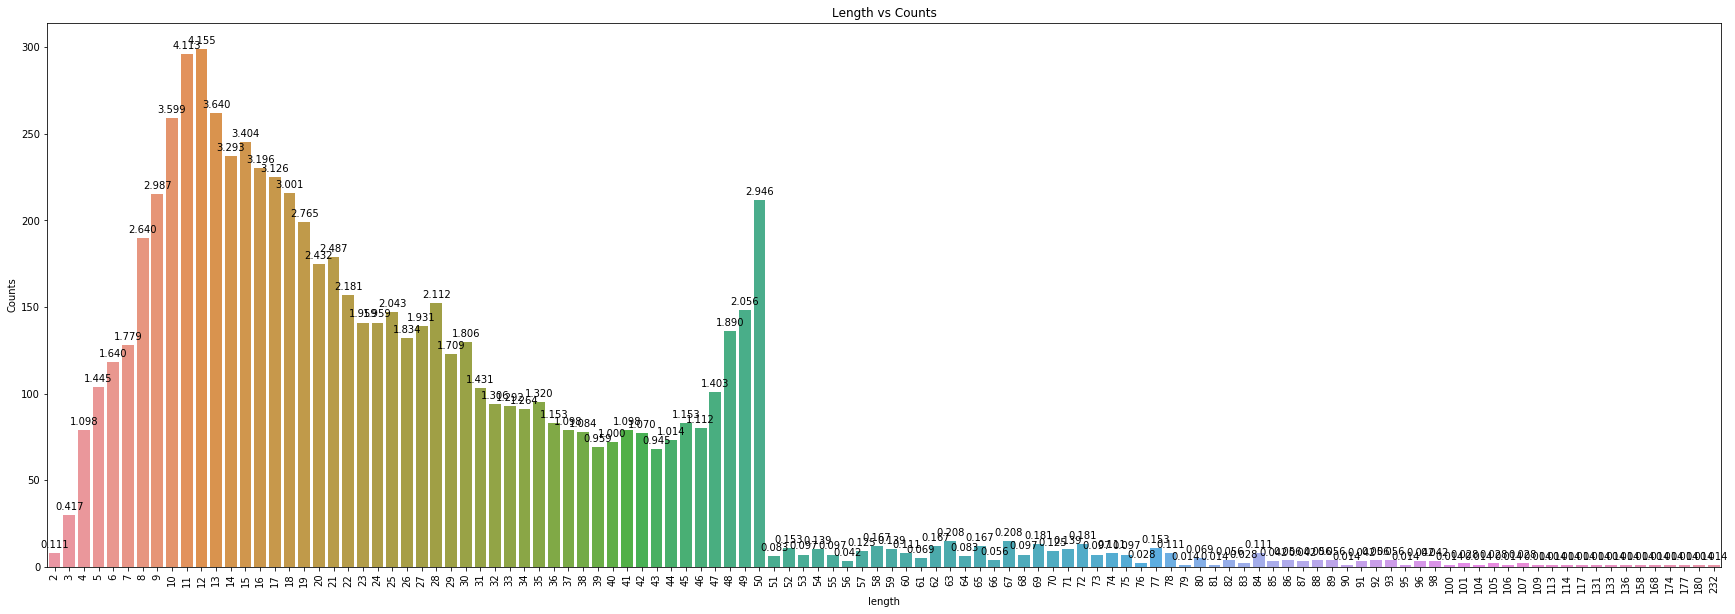

In [16]:
data["track_name_length"]= data["track_name"].str.len()
plt.figure(figsize=(30,10))
ax=sns.countplot(x="track_name_length",data=data)
ax.set(xlabel='length', ylabel='Counts',title="Length vs Counts")
plt.xticks(rotation=90)

total = len(data['track_name_length'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.3f}'.format(height*100/total),
            ha="center") 
  
plt.show()

In [17]:
data["currency_length"]= data["currency"].str.len()

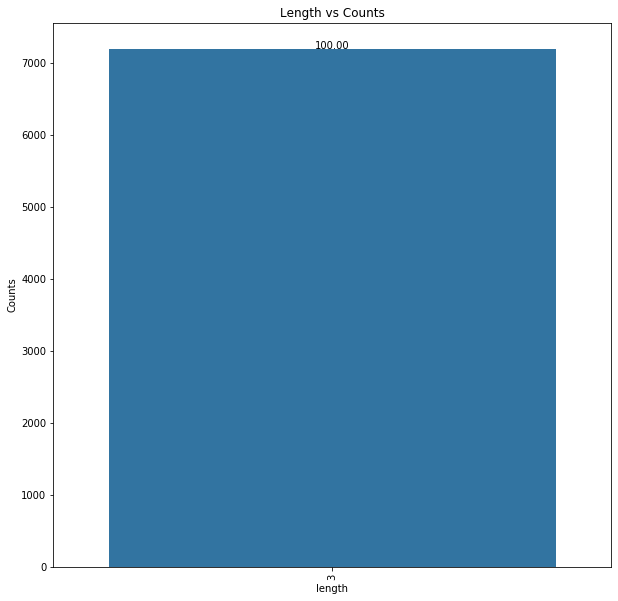

In [18]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x="currency_length",data=data)
ax.set(xlabel='length', ylabel='Counts',title="Length vs Counts")
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height*100/total),
            ha="center") 
  
plt.show()

In [19]:
data["prime_genre_length"]= data["prime_genre"].str.len()

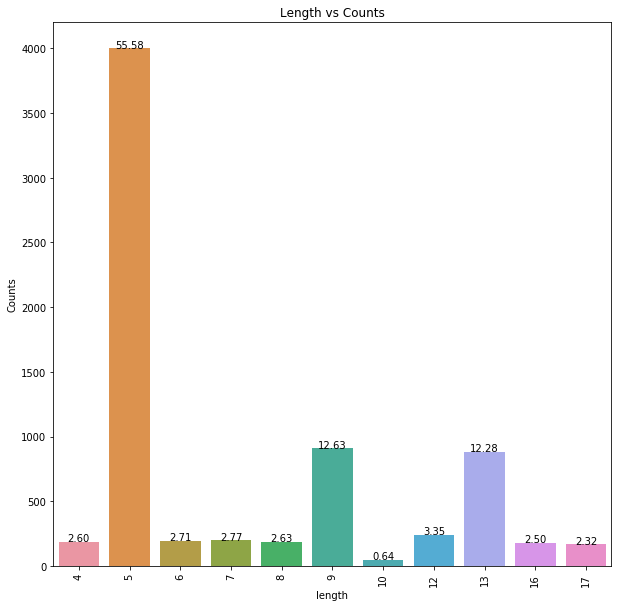

In [20]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x="prime_genre_length",data=data)
ax.set(xlabel='length', ylabel='Counts',title="Length vs Counts")
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height*100)/total),
            ha="center") 
  
plt.show()

In [21]:
# If data pattern is huge then Grouping the data based on
# 1. Only Char
# 2. Char + Space + dot
# 3. Char + Digit + Space + Dot
# 4. Only Digits
# 5. Digit + Dot
# 6. Digit + Char
# 7. Digit + Char + Special Char (except dot | Space )
# 8. Only Special